# Reinforcement Learning
- It is a machine learning technique
- rather than feeding the machine learning model with millions of examples we let our model to come up with its own examles by exploring environment
1) Environment - agent explores 
2) Agent - entity that is exploring env. it interacts and take diff actions
3) State - status of agent in env
4) Action - interaction b/w agent and env
5) Reward  - every action by an agent takes willl result in a reward(+ or -), goal of agent is to maximise the reward in an env
## Q-Learning
- It's a technique to implement this RL
- It involves a matrix of action=reward value. This matrix is reffered as Q-Table or Q-Matrix.
- shape of matrix(no of possible states, no of possible actions) - matrix[m,n] = agents expected reward given they are in state m and take action n
- after sucessfull learning of this Q-matrix we can determine the action an agent shld take in any state by looking at that states row in matrix and taking maximum val col as action
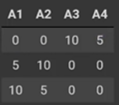
- A1, A2, A3, A4 are the actions and 3 rows are the 3 states
- peferred actions
1) State 1: A3
2) State 2: A2
3) State 3: A1
## Learning the Q-Table
- it updates the values in the Q-Table
- The agent learns by exploring the env and obs the outcome/reward from each action it takes in a given state
- There are 2 ways that our agent caan decide on which action to take
1) Randomly picking a valid action
2) Using the current Q-Table to fins best action
- at the begining of the agents learning it will mostly take random actions in order to explore env and enter many diff states
- As it starts to explore more of env it will start to graddually rely more on its learned values Q-Table to take actions
- It is imp that agent has a good balance of taking random actions and using learned values to ensure it doees get trapped in a local maxima
- After each new action agent will record the new state that it has entered and reward that it recieved from taking that action. These values are used to update the Q-Table
- The agent will stop taking actions only once a certain time is reaached or it has acheived the goal or reached the end of env
## Updating Q-Values
- Formula for updating the Q-values
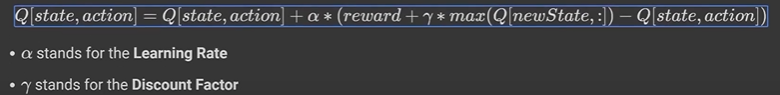
### Learning rate 
- It is a numeric const that defines how much change is permitted on each Q-Table update.
- A high LR means each upadte will intriduce a large change to the current state-action val.
- A small LR has more subtle change
- Modifying the LR will change how the agent explores the env and how quickly it det the final values of Q-Table
### Discount Factor
- It is used to balance hpw much  focus is to put on the current and future reward.
- A high DF means that future rewards will be condsidered more heavily

## Q-Learning Example
- We use Q-Learning algorithm to train an agent to navigate a popular env from the Open AI Gym(practice ML using unique env)


In [24]:
!pip install pygame

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install gym

Defaulting to user installation because normal site-packages is not writeable
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for gym: filename=gym-0.26.2-py3-none-any.whl size=827648 sha256=821963a82be27551b30b7579332600e8f6aabdfea2131b6a323ce525db6c8a79
  Stored in directory: c:\users\bhanu teja\appdata\local\pip\cache\wheels\af\2b\30\5e78b8b9599f2a2286a582b8da80594f654bf0e18d825a4405
Successfully built gym


In [1]:
import gym

In [2]:
# load an env using gym.make
env = gym.make('FrozenLake-v1') # here we use Fros=zenLake env

In [3]:
# get info abt the env
# each env in gym has observation space and action space
print(env.observation_space.n) # get no of states
print(env.action_space.n) # get no of actions

16
4


In [4]:
env.reset() # reset env to default state

(0, {'prob': 1})

In [5]:
action = env.action_space.sample() # get random action
print(action)

1


In [6]:
new_state, reward, done,truncated, info = env.step(action) # take action, notice it returns info abt the action

In [7]:
env.render() # render the GUI for the env

C:\Users\BHANU TEJA\AppData\Roaming\Python\Python39\site-packages\gym\envs\toy_text\frozen_lake.py:271: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym("FrozenLake-v1", render_mode="rgb_array")
  logger.warn(


## Building The Q-Table
- 1st we need to build an empty Q-Table

In [1]:
import gym
import numpy as np
import time

In [2]:
env = gym.make('FrozenLake-v1')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

In [3]:
Q = np.zeros((STATES,ACTIONS)) # crate a matrix with all 0's
Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

## Constants
- we need LR, DF to update our Q-Table and tell the agent when to stop the training

In [4]:
EPISODES = 1500 # how many time to run the env from beg
MAX_STEPS= 100 # max no of steps allowed for each run of env

LEARNING_RATE = 0.01
GAMMA = 0.96

RENDER = False 
epsilon = 0.9

## Picking an Action
- we have 2 ways to pick an action
- heer we define a new rule epsilon that will us the prob of selecting a random action
- the val will start off very igh and slowly decrease as the agent learns more abt env

In [21]:
epsilon = 0.9 # start with 90% chance of picking a random action

# pick action
if np.random.uniform(0,1)<epsilon: # we will check if a rand picked val is < epsilon
    action = env.action_space.sample() # take rand action
else:
    action = np.argmax(Q[state, :]) # use Q-Table to pick best action based on current val

## Updating Q Values
- implement the formula

In [9]:
rewards = []

for episode in range(EPISODES):
    state = env.reset()[0]
    for _ in range(MAX_STEPS):
        if RENDER:
            env.render()
        if np.random.uniform(0,1)<epsilon: # we will check if a rand picked val is < epsilon
            action = env.action_space.sample() # take rand action
        else:
            action = np.argmax(Q[state, :]) # use Q-Table to pick best action based on current val
        next_state, reward, done, _, _ = env.step(action)
        Q[state, action] = Q[state, action] + LEARNING_RATE*(reward+GAMMA*np.max(Q[next_state,:])-Q[state, action])
        state = next_state
        
        if done:
            rewards.append(reward)
            epsilon -= 0.001
            break # reached goal
print(Q)
print(f"Average reward: {sum(rewards)/len(rewards)}")
            

[[1.93536431e-05 3.44938807e-02 2.42768907e-05 1.64948361e-05]
 [4.35032747e-06 2.23252763e-02 7.75504914e-06 2.07017324e-05]
 [3.93878243e-02 4.06536264e-05 6.11402594e-05 9.59154754e-06]
 [2.37818961e-05 1.66679908e-07 1.10619236e-08 2.17435900e-08]
 [5.27817518e-02 5.61523572e-05 4.07696050e-05 2.23210637e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.44691921e-02 4.26107850e-04 2.69248517e-04 8.43448038e-07]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.30195535e-05 8.74135930e-05 1.56439069e-04 7.73028579e-02]
 [3.67581018e-04 5.93952203e-04 1.26423556e-01 4.98462889e-04]
 [2.09693926e-05 1.82763283e-03 1.70871437e-01 2.78286481e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.65243828e-04 4.39560543e-04 2.28433655e-03 2.22294470e-01]
 [3.81725402e-03 5.44340189e-01 4.16110427e-02 3.86463249e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

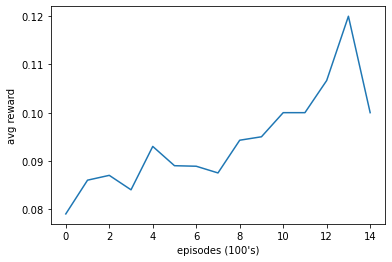

In [10]:
import matplotlib.pyplot as plt
def get_average(values):
    return sum(values)/len(values)
avg_rewards = []
for i in range(0,len(rewards),100):
    avg_rewards.append(get_average(rewards[i:i+1000]))
    
plt.plot(avg_rewards)
plt.ylabel('avg reward')
plt.xlabel('episodes (100\'s)')
plt.show()